In [12]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import re

sys.path.append("../../src/md_sim")
from structure_analysis import load_hdf

In [21]:
#h5_file                         = "/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/airebo_m.h5"
h5_file                         = "/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/airebo_m.h5"
h5_file                         = "/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_lcbop/lcbop.h5"
#h5_file                         = "/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_edip/edip.h5"
#h5_file                         = "/media/benjamin/BenDrive/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/airebo_m.h5"
run_dic                         = load_hdf(h5_file)

structure_analysis - DEBUG - Found group key: lcbop
structure_analysis - DEBUG - Processing key: 3_35_1000K_8x8x8
structure_analysis - DEBUG - Subkey is :thermo_equilibration
structure_analysis - DEBUG - Subkey is :thermo_expansion
structure_analysis - DEBUG - Processing key: 3_35_2000K_8x8x8
structure_analysis - DEBUG - Subkey is :thermo_equilibration
structure_analysis - DEBUG - Subkey is :thermo_expansion
structure_analysis - DEBUG - Processing key: 3_35_3000K_8x8x8
structure_analysis - DEBUG - Subkey is :thermo_equilibration
structure_analysis - DEBUG - Subkey is :thermo_expansion
structure_analysis - DEBUG - Processing key: 3_35_4000K_8x8x8
structure_analysis - DEBUG - Subkey is :thermo_equilibration
structure_analysis - DEBUG - Subkey is :thermo_expansion
structure_analysis - DEBUG - Processing key: 3_45_1000K_8x8x8
structure_analysis - DEBUG - Subkey is :thermo_equilibration
structure_analysis - DEBUG - Subkey is :thermo_expansion
structure_analysis - DEBUG - Processing key: 3_4

In [22]:
print(run_dic['3_35_1000K_8x8x8'].keys())
run_dic['3_35_1000K_8x8x8']['diamond_lattice']

dict_keys(['diamond_center', 'diamond_lattice', 'diamond_onion', 'diamond_onion_outer_r', 'diamond_radius', 'rdf_total', 'structure_type', 'thermo_equilibration', 'thermo_expansion', 'timesteps', 'metadata'])


array([[   0, 4096,    0, ...,    0,    0,    0],
       [   0, 4096,    0, ...,    0,    0,    0],
       [   0, 4096,    0, ...,    0,    0,    0],
       ...,
       [4096,    0,    0, ...,    0,    0,    0],
       [4096,    0,    0, ...,    0,    0,    0],
       [4096,    0,    0, ...,    0,    0,    0]])

In [23]:
# Set the matplotlib backend and make the plots a bit bigger
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rc('text', usetex = True)

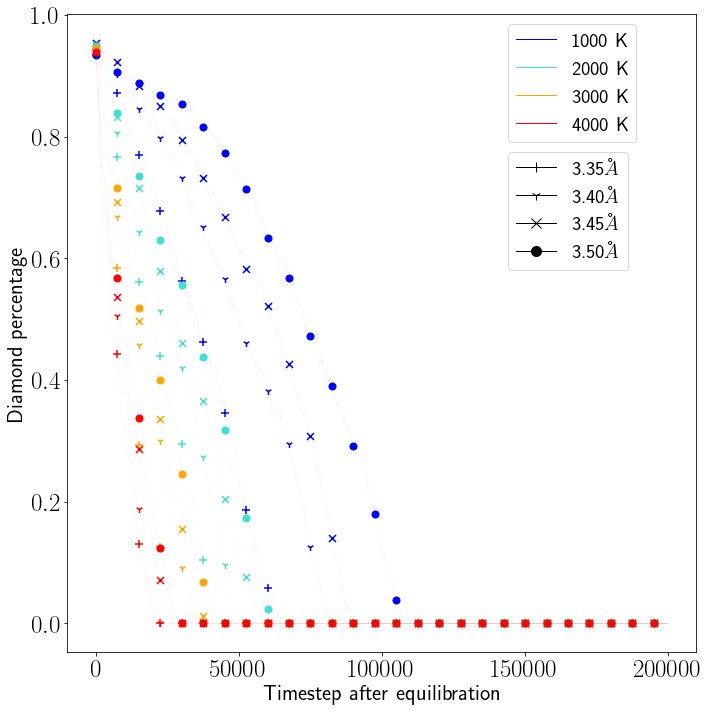

In [24]:
expansion_step  = 161

import matplotlib.path as mpath
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)


fig, ax       = plt.subplots(figsize=(10, 10))
color_T       = {1000:'blue',2000:'turquoise',3000:'orange',4000:'red'}
linestyle     = {3.35:(0,(1,0.5)),3.4:(0,(2,5)),3.45:(0,(1,15)),3.5:(1,(1,1))}
markerstyle   = {3.35:'+',3.4:'1',3.45:'x',3.5:'o'}

for id, run_key in enumerate(run_dic.keys()):
    if run_key == 'airebo_m':
        continue
    run                 = run_dic[run_key]
    T, a                = int(run['metadata']['temperature'].values[0]), float(run['metadata']['lattice_constant'].values[0])
    diamond_atoms       = np.sum(run['diamond_lattice'][:,1:4],axis=1)
    diamond_perc        = diamond_atoms / (4096 - 8)
    timesteps           = np.arange(len(diamond_perc[expansion_step:])) * 125.
    ax.plot(timesteps,diamond_perc[expansion_step:],linestyle =(0,(1,5)), color = color_T[T], linewidth = 0.1) 
    ax.scatter(timesteps[::60],diamond_perc[expansion_step::60],color = color_T[T], marker=markerstyle[a], s=50)


from matplotlib.lines import Line2D
colour_legend            = [Line2D([0], [0], color=color_T[T], lw=1.) for T in [1000,2000,3000,4000]]
legend_1                 = ax.legend(colour_legend, [f"{str(T)} K" for T in [1000,2000,3000,4000]], loc =(0.7,0.8),fontsize=20)

marker_legend            = [Line2D([0], [0], c='k', marker=markerstyle[a], lw=1.,markersize=10.) for a in [3.35,3.4,3.45,3.5]]
legend_2                 = ax.legend(marker_legend, [f"{a}"+r"$\AA$" for a in ["3.35","3.40","3.45","3.50"]],loc=(0.7,0.6),fontsize=20)
### because matplotlib is stupid it removes the first legend when creating the second so I have to add it again.... idiots

'''
start, end, ymin, ymax   = 200000, 200300, 0.4, 0.85
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='green', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 15000., ymax  + 0.02, 'stable', transform=trans,fontsize=22,color='green')

start, end, ymin, ymax   = 200000, 200300, 0.035, 0.3
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='darkred', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 15000., ymax  + 0.02, 'unstable', transform=trans,fontsize=22,color='darkred')
'''

ax.add_artist(legend_1)
ax.set_ylabel(r'Diamond percentage',fontsize=22)
ax.set_xlabel(r'Timestep after equilibration',fontsize=22)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
fig.tight_layout()
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_edip.pdf')
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_lrbop.pdf')
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_airebo_m_old.pdf')
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_airebo_m.eps')

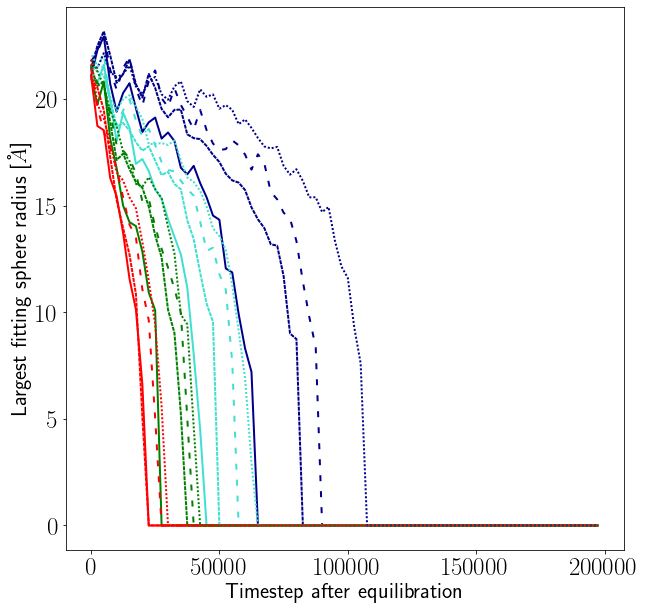

In [26]:
fig, ax       = plt.subplots(figsize=(10, 10))
color_T       = {1000:'darkblue',2000:'turquoise',3000:'green',4000:'red'}
linestyle     = {3.35:(0,(1,0)),3.4:(0,(2,0.5)),3.45:(0,(3,5)),3.5:(1,(1,1))}
markerstyle   = {3.35:'+',3.4:'1',3.45:'x',3.5:'o'}

for id, run_key in enumerate(run_dic.keys()):
    if run_key == 'airebo_m':
        continue
    run                 = run_dic[run_key]
    T, a                = int(run['metadata']['temperature'].values[0]), float(run['metadata']['lattice_constant'].values[0])
    radius              = run_dic[run_key]['diamond_radius']
    timesteps           = np.arange(len(diamond_perc[expansion_step:])) * 125.
    ax.plot(timesteps[::20], radius[expansion_step::20],linestyle =linestyle[a], color = color_T[T], linewidth = 2.)
    #ax.scatter(timesteps[::300],radius[expansion_step::300],color = color_T[T], marker=markerstyle[a], s=50)
    #ax.plot(timesteps,diamond_perc[expansion_step:],linestyle =(0,(1,5)), color = color_T[T], linewidth = 0.1) 
    #ax.scatter(timesteps[::60],diamond_perc[expansion_step::60],color = color_T[T], marker=markerstyle[a], s=50)

ax.set_ylabel(r'Largest fitting sphere radius [$\AA$]',fontsize=22)
ax.set_xlabel(r'Timestep after equilibration',fontsize=22)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)

'''

start, end, ymin, ymax   = 200200, 200300, 0.64, 0.95
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='green', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 25000., ymax - 0.05, 'stable', transform=trans,fontsize=22,color='green')

start, end, ymin, ymax   = 200200, 200300, 0.04, 0.55
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='darkred', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 35000., ymax - 0.2, 'unstable', transform=trans,fontsize=22,color='darkred')
'''

#fig.tight_layout()
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_airebo_m.pdf')
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_sphere_edip.pdf')
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_sphere_lrbop.pdf')

In [9]:
from load_lammps_log import load_thermo
dfs, dt, n_atoms, run_steps = load_thermo("/mnt/TOSHIBA_EXT/Nextcloud/Work/W_PhD/W_PhD_Analysis/Simulations/LAMMPS/free_expansion_airebo_m/grid_3_45/3000K_8x8x8.log")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


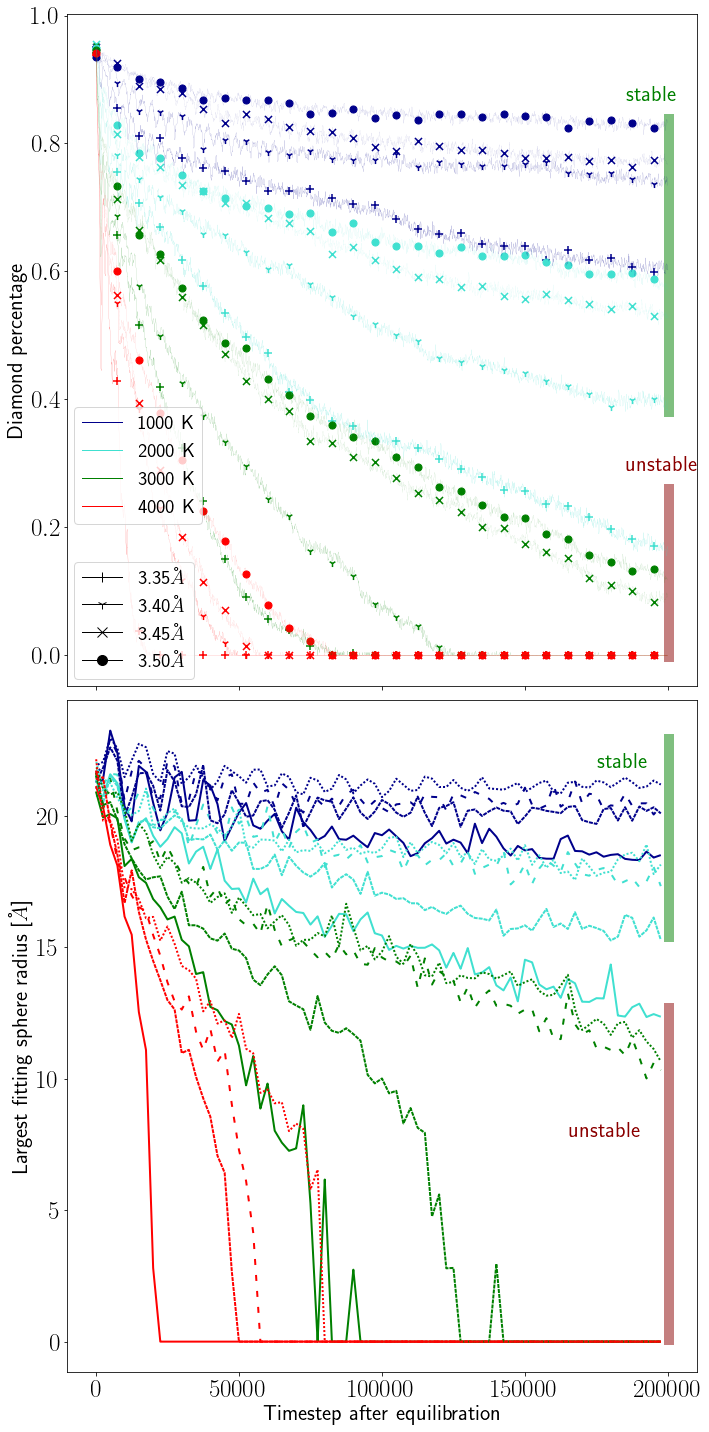

In [9]:
expansion_step  = 161

import matplotlib.path as mpath
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)


fig, axes       = plt.subplots(2,figsize=(10, 20),sharex=True)
color_T       = {1000:'blue',2000:'turquoise',3000:'orange',4000:'red'}
linestyle     = {3.35:(0,(1,0.5)),3.4:(0,(2,5)),3.45:(0,(1,15)),3.5:(1,(1,1))}

color_T       = {1000:'darkblue',2000:'turquoise',3000:'green',4000:'red'}
linestyle     = {3.35:(0,(1,0)),3.4:(0,(2,0.5)),3.45:(0,(3,5)),3.5:(1,(1,1))}

markerstyle   = {3.35:'+',3.4:'1',3.45:'x',3.5:'o'}

for id, run_key in enumerate(run_dic.keys()):
    if run_key == 'airebo_m':
        continue
    run                 = run_dic[run_key]
    T, a                = int(run['metadata']['temperature'].values[0]), float(run['metadata']['lattice_constant'].values[0])
    diamond_atoms       = np.sum(run['diamond_lattice'][:,1:4],axis=1)
    diamond_perc        = diamond_atoms / (4096 - 8)
    timesteps           = np.arange(len(diamond_perc[expansion_step:])) * 125.
    #axes[0].plot(timesteps,diamond_perc[expansion_step:],linestyle =(0,(1,5)), color = color_T[T], linewidth = 0.1)
    axes[0].plot(timesteps,diamond_perc[expansion_step:],linestyle =linestyle[a], color = color_T[T], linewidth = 0.1)
    axes[0].scatter(timesteps[::60],diamond_perc[expansion_step::60],color = color_T[T], marker=markerstyle[a], s=50)


from matplotlib.lines import Line2D
colour_legend            = [Line2D([0], [0], color=color_T[T], lw=1.) for T in [1000,2000,3000,4000]]
legend_1                 = axes[0].legend(colour_legend, [f"{str(T)} K" for T in [1000,2000,3000,4000]], loc =(0.01,0.24),fontsize=20)

marker_legend            = [Line2D([0], [0], c='k', marker=markerstyle[a], lw=1.,markersize=10.) for a in [3.35,3.4,3.45,3.5]]
legend_2                 = axes[0].legend(marker_legend, [f"{a}"+r"$\AA$" for a in ["3.35","3.40","3.45","3.50"]],loc=(0.01,0.01),fontsize=20)
### because matplotlib is stupid it removes the first legend when creating the second so I have to add it again.... idiots

start, end, ymin, ymax   = 200200, 200300, 0.4, 0.85
axes[0].axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='green', linewidth=10.)
trans = axes[0].get_xaxis_transform()
axes[0].text((start + end) / 2 - 15000., ymax  + 0.02, 'stable', transform=trans,fontsize=22,color='green')

start, end, ymin, ymax   = 200200, 200300, 0.035, 0.3
axes[0].axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='darkred', linewidth=10.)
trans = axes[0].get_xaxis_transform()
axes[0].text((start + end) / 2 - 15000., ymax  + 0.02, 'unstable', transform=trans,fontsize=22,color='darkred')

axes[0].add_artist(legend_1)
axes[0].set_ylabel(r'Diamond percentage',fontsize=22)
#axes[0].set_xlabel(r'Timestep after equilibration',fontsize=22)
axes[0].xaxis.set_tick_params(labelsize=25)
axes[0].yaxis.set_tick_params(labelsize=25)

ax            = axes[1]
color_T       = {1000:'darkblue',2000:'turquoise',3000:'green',4000:'red'}
linestyle     = {3.35:(0,(1,0)),3.4:(0,(2,0.5)),3.45:(0,(3,5)),3.5:(1,(1,1))}
markerstyle   = {3.35:'+',3.4:'1',3.45:'x',3.5:'o'}

for id, run_key in enumerate(run_dic.keys()):
    if run_key == 'airebo_m':
        continue
    run                 = run_dic[run_key]
    T, a                = int(run['metadata']['temperature'].values[0]), float(run['metadata']['lattice_constant'].values[0])
    radius              = run_dic[run_key]['diamond_radius']
    timesteps           = np.arange(len(diamond_perc[expansion_step:])) * 125.
    ax.plot(timesteps[::20], radius[expansion_step::20],linestyle =linestyle[a], color = color_T[T], linewidth = 2.)
    #ax.scatter(timesteps[::300],radius[expansion_step::300],color = color_T[T], marker=markerstyle[a], s=50)
    #ax.plot(timesteps,diamond_perc[expansion_step:],linestyle =(0,(1,5)), color = color_T[T], linewidth = 0.1) 
    #ax.scatter(timesteps[::60],diamond_perc[expansion_step::60],color = color_T[T], marker=markerstyle[a], s=50)

ax.set_ylabel(r'Largest fitting sphere radius [$\AA$]',fontsize=22)
ax.set_xlabel(r'Timestep after equilibration',fontsize=22)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)

start, end, ymin, ymax   = 200200, 200300, 0.64, 0.95
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='green', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 25000., ymax - 0.05, 'stable', transform=trans,fontsize=22,color='green')

start, end, ymin, ymax   = 200200, 200300, 0.04, 0.55
ax.axvspan(start, end, ymin=ymin, ymax=ymax, alpha=0.5, color='darkred', linewidth=10.)
trans = ax.get_xaxis_transform()
ax.text((start + end) / 2 - 35000., ymax - 0.2, 'unstable', transform=trans,fontsize=22,color='darkred')

fig.tight_layout()
#fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_airebo_m.pdf')
fig.savefig('/home/benjamin/Nextcloud/Work/W_PhD/W_PhD_Articles/Heuser_ND_recovery/figures/diamond_perc_airebo_m.eps')

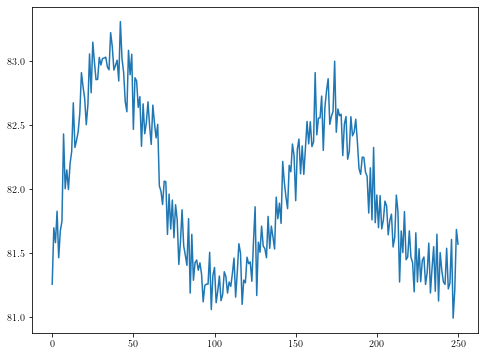

In [63]:
plt.plot(dfs[0]['Press'].values[150:]*1e-4)

In [ ]:
for id, run_key in enumerate(run_dic.keys()):
    if run_key == 'airebo_m':
        continue
    run                 = run_dic[run_key]
    T, a                = int(run['metadata']['temperature'].values[0]), float(run['metadata']['lattice_constant'].values[0])
    diamond_atoms       = np.sum(run['diamond_lattice'][:,1:4],axis=1)

734

In [73]:
run_dic['3_35_1000K_8x8x8']['metadata']['temperature']

0    1000
Name: temperature, dtype: object